<a href="https://colab.research.google.com/github/Homedepot5/DataScience/blob/origin%2Ffeature%2Fdevelopment/GradientDescent_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from  sklearn.linear_model import LinearRegression
import math

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving GradientDescent.csv to GradientDescent (7).csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['GradientDescent.csv']))
df

,name,math,cs
0,david,92,98
1,laura,56,68
2,sanjay,88,81
3,wei,70,80
4,jeff,80,83
5,aamir,49,52
6,venkat,65,66
7,virat,35,30
8,arthur,66,68
9,paul,67,73


In [ ]:
x=df[['math']]
x= np.array(x)
x

array([[92],
       [56],
       [88],
       [70],
       [80],
       [49],
       [65],
       [35],
       [66],
       [67]])

In [ ]:
y=df[['cs']]
y=np.array(y)
y

array([[98],
       [68],
       [81],
       [80],
       [83],
       [52],
       [66],
       [30],
       [68],
       [73]])

In [ ]:
def predict_using_sklean():
   
    r = LinearRegression()
    r.fit(df[['math']],df.cs)
    return r.coef_, r.intercept_

In [ ]:
def gradient_descent(x,y):
    m_curr = b_curr = 0
    rate = 0.01
    n = len(x)
    cost_previous=0
    plt.scatter(x,y,color='red',marker='+',linewidth='5')
    for i in range(10000):
        y_predicted = m_curr * x + b_curr
        cost=(1/n)*sum([value**2 for value in (y-y_predicted)])
        plt.plot(x,y_predicted,color='green')
        md = -(2/n)*sum(x*(y-y_predicted))
        yd = -(2/n)*sum(y-y_predicted)
        m_curr = m_curr - rate * md
        b_curr = b_curr - rate * yd
        if math.isclose(cost, cost_previous, rel_tol=1e-20):
            break
        cost_previous = cost 
        print("m {}, b {}, cost {} ,iteration {}".format(m_curr,b_curr,cost,i))
        return m_curr, b_curr

In [ ]:
gradientDescennt(x,y)

m [98.918], b [1.398], cost [5199.1] ,iteration 0
Using gradient descent function: Coef [98.918] Intercept [1.398]
Using sklearn: Coef [1.01773624] Intercept 1.9152193111569034


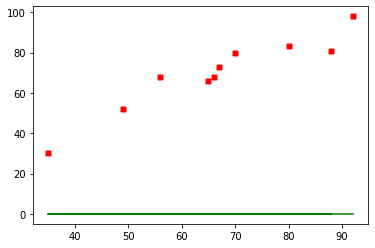

In [ ]:
m, b = gradient_descent(x,y)
print("Using gradient descent function: Coef {} Intercept {}".format(m, b))

m_sklearn, b_sklearn = predict_using_sklean()
print("Using sklearn: Coef {} Intercept {}".format(m_sklearn,b_sklearn))